In [ ]:
from google.colab import files

uploaded=files.upload()

Saving dataset.csv to dataset (1).csv


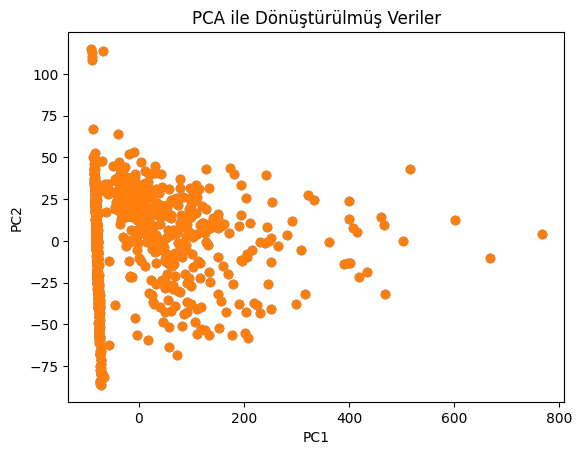

Dönüştürülmüş Veriler:
[[-75.71424916 -35.95494354]
 [-82.35846646  28.90955895]
 [-74.63022933 -67.90963328]
 ...
 [ 32.11298721   3.37922193]
 [-80.21409513 -14.19059537]
 [-81.30834662  21.6230423 ]]
Varyansı Açıklama Oranı:
[0.88853359 0.06159289]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Verileri Yükleme
data = pd.read_csv("dataset.csv")

# PCA Uygulama
pca = PCA(n_components=2)  # Boyut azaltma (2D görselleştirme için)
pca.fit(data)

# Dönüştürülmüş Verileri Alma
transformed_data = pca.transform(data)

# Varyansı Açıklama Oranını Bulma
explained_variance = pca.explained_variance_ratio_

# Görselleştirme
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])  # İlk 2 bileşen
plt.xlabel("PC1")
plt.ylabel("PC2")

# Hedef Değişkenlerine Göre Renklendirme (eğer varsa)
if 'target' in data.columns:  # Hedef değişken varsa renklendir
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=data['target'], cmap=plt.cm.Set1)
else:  # Hedef değişken yoksa varsayılan renklendirme
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

plt.title("PCA ile Dönüştürülmüş Veriler")
plt.show()

# Sonuçları Yazdırma
print("Dönüştürülmüş Veriler:")
print(transformed_data)

print("Varyansı Açıklama Oranı:")
print(explained_variance)


LDA Sonuçları:
Sınıf Sayısı: 2
LDA Bileşen Sayısı: 1
LDA Sınıf Ortalamaları:
[[  3.298      109.98        68.184       19.664       68.792
   30.3042       0.429734    31.19      ]
 [  4.86567164 141.25746269  70.82462687  22.1641791  100.3358209
   35.14253731   0.5505      37.06716418]]
LDA Puanları:
[[ 1.38024702e+00]
 [-1.56452399e+00]
 [ 1.76618515e+00]
 [-1.69058752e+00]
 [ 2.20726804e+00]
 [-6.30945011e-01]
 [-1.32918043e+00]
 [ 1.12663761e+00]
 [ 1.44250389e+00]
 [-1.57821647e+00]
 [-3.60325075e-01]
 [ 2.26355831e+00]
 [ 1.64069266e+00]
 [ 1.18282272e+00]
 [ 1.13107071e+00]
 [ 3.91039109e-01]
 [ 1.57575445e-01]
 [-3.97093569e-01]
 [ 1.61251574e-01]
 [-2.61372162e-01]
 [ 2.66682978e-01]
 [ 4.16996885e-02]
 [ 2.70210532e+00]
 [ 2.12661643e-02]
 [ 1.30195146e+00]
 [ 5.13605683e-01]
 [ 1.39813224e+00]
 [-1.58728261e+00]
 [ 8.87292345e-01]
 [-9.52716561e-02]
 [ 4.05704236e-01]
 [ 8.91805731e-01]
 [-1.54050347e+00]
 [-1.75281602e+00]
 [ 4.88314327e-01]
 [-6.08892962e-01]
 [ 1.1702201

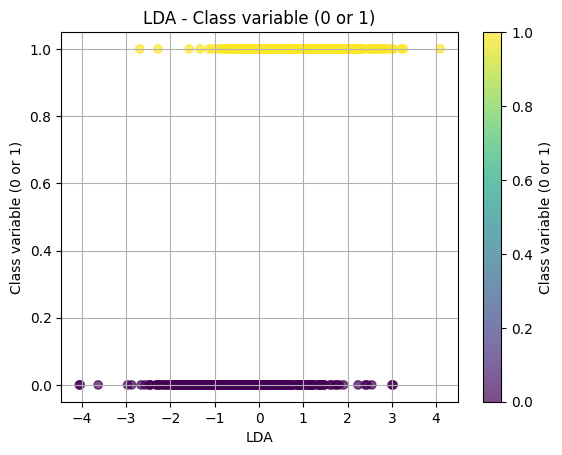

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


veri_seti = pd.read_csv("dataset.csv")
# Özellikler ve hedef değişkeni ayırın
X = veri_seti.drop(columns=["Class variable (0 or 1)"])
y = veri_seti["Class variable (0 or 1)"]

# Sınıf sayısını kontrol edin
num_classes = len(set(y))

# LDA uygulayın
lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], num_classes - 1))
X_lda = lda.fit_transform(X, y)

# LDA sonuçlarını yazdırın
print("LDA Sonuçları:")
print(f"Sınıf Sayısı: {num_classes}")
print(f"LDA Bileşen Sayısı: {X_lda.shape[1]}")

print(f"LDA Sınıf Ortalamaları:\n{lda.means_}")

# LDA puanlarını yazdırın
print("LDA Puanları:")
print(X_lda)

# LDA ile ayrımcılık oranını yazdırın
print(f"LDA Ayrımcılık Oranı: {lda.score(X, y)}")

# LDA sonuçlarını görselleştirin
import matplotlib.pyplot as plt

plt.scatter(X_lda, y, c=y, cmap='viridis', alpha=0.7)
plt.xlabel('LDA')
plt.ylabel('Class variable (0 or 1)')
plt.title('LDA - Class variable (0 or 1)')
plt.colorbar(label='Class variable (0 or 1)')
plt.grid(True)
plt.show()
